In [50]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.0 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [51]:
adata=sc.read("C:/Users/hyjfo/Downloads/WT_Mga_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 53548 × 2000
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [52]:
adata.obs['type'] = (adata.obs['batch'].map
                     (lambda x: {'WT_1':'WT', 'WT_2':'WT', 'WT_3':'WT', 'Mga_1':'Mga', 'Mga_2':'Mga', 'Mga_3':'Mga',}.get(x, x)).astype("category"))
adata

AnnData object with n_obs × n_vars = 53548 × 2000
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'leiden', 'cell_type', 'type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

C:\Users\hyjfo\anaconda3\envs\test2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


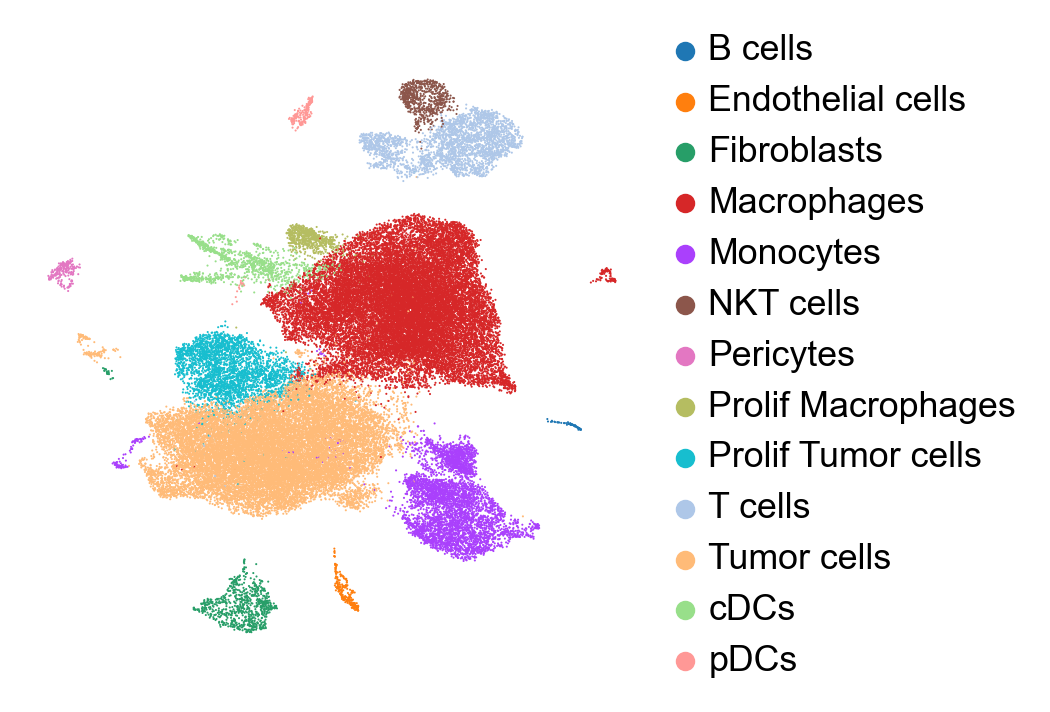

C:\Users\hyjfo\anaconda3\envs\test2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


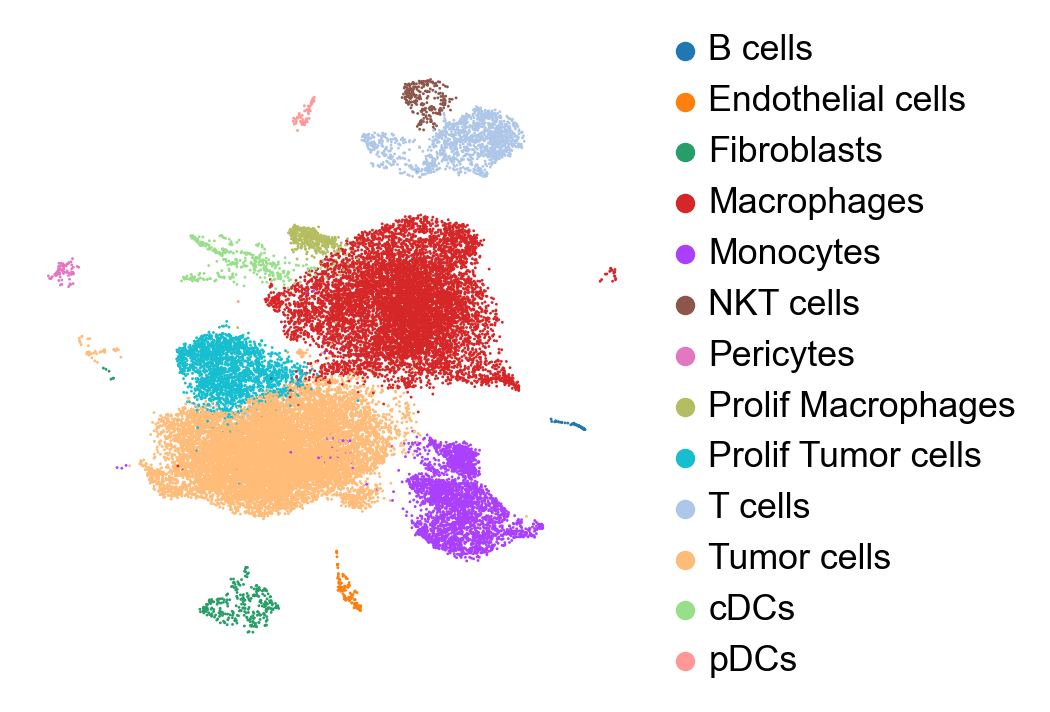

C:\Users\hyjfo\anaconda3\envs\test2\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


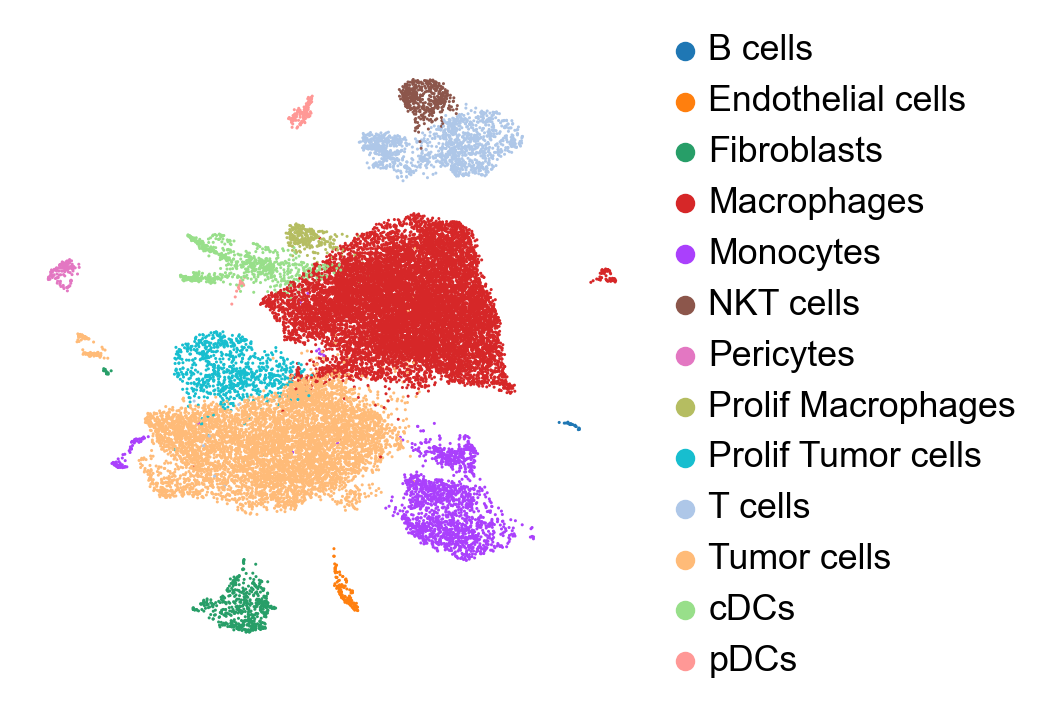

In [55]:
sc.pl.umap(adata, color=['cell_type'], legend_loc='right margin', frameon=False, title='', use_raw=False, save='1.pdf')
sc.pl.umap(adata[adata.obs['type'].isin(['WT'])], color=['cell_type'], legend_loc='right margin', frameon=False, title='', use_raw=False, save='2.pdf')
sc.pl.umap(adata[adata.obs['type'].isin(['Mga'])], color=['cell_type'], legend_loc='right margin', frameon=False, title='', use_raw=False, save='3.pdf')

In [54]:
types = ['WT', 'Mga']
counts_table = pd.DataFrame()

unique_values = adata.obs['cell_type'].unique()

for t in types:
    counts = adata[adata.obs['type'].isin([t])].obs['cell_type'].value_counts().reindex(unique_values, fill_value=0).sort_index()
    counts_table[t] = counts
    
# Fill NaN values with 0
counts_table = counts_table.fillna(0)
print(counts_table)
counts_table.to_csv('C:/Users/hyjfo/Documents/counts_table_predicted_labels.txt')

                       WT    Mga
cell_type                       
B cells                55     22
Endothelial cells     107    130
Fibroblasts           292    503
Macrophages          9066  12148
Monocytes            2941   1806
NKT cells             236    449
Pericytes              73    127
Prolif Macrophages    409    239
Prolif Tumor cells   2144    810
T cells              1353   1307
Tumor cells         11570   6476
cDCs                  341    735
pDCs                   60    149


In [56]:
adata.uns['cell_type_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896'], dtype=object)

C:\Users\hyjfo\AppData\Local\Temp\ipykernel_18668\340901191.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


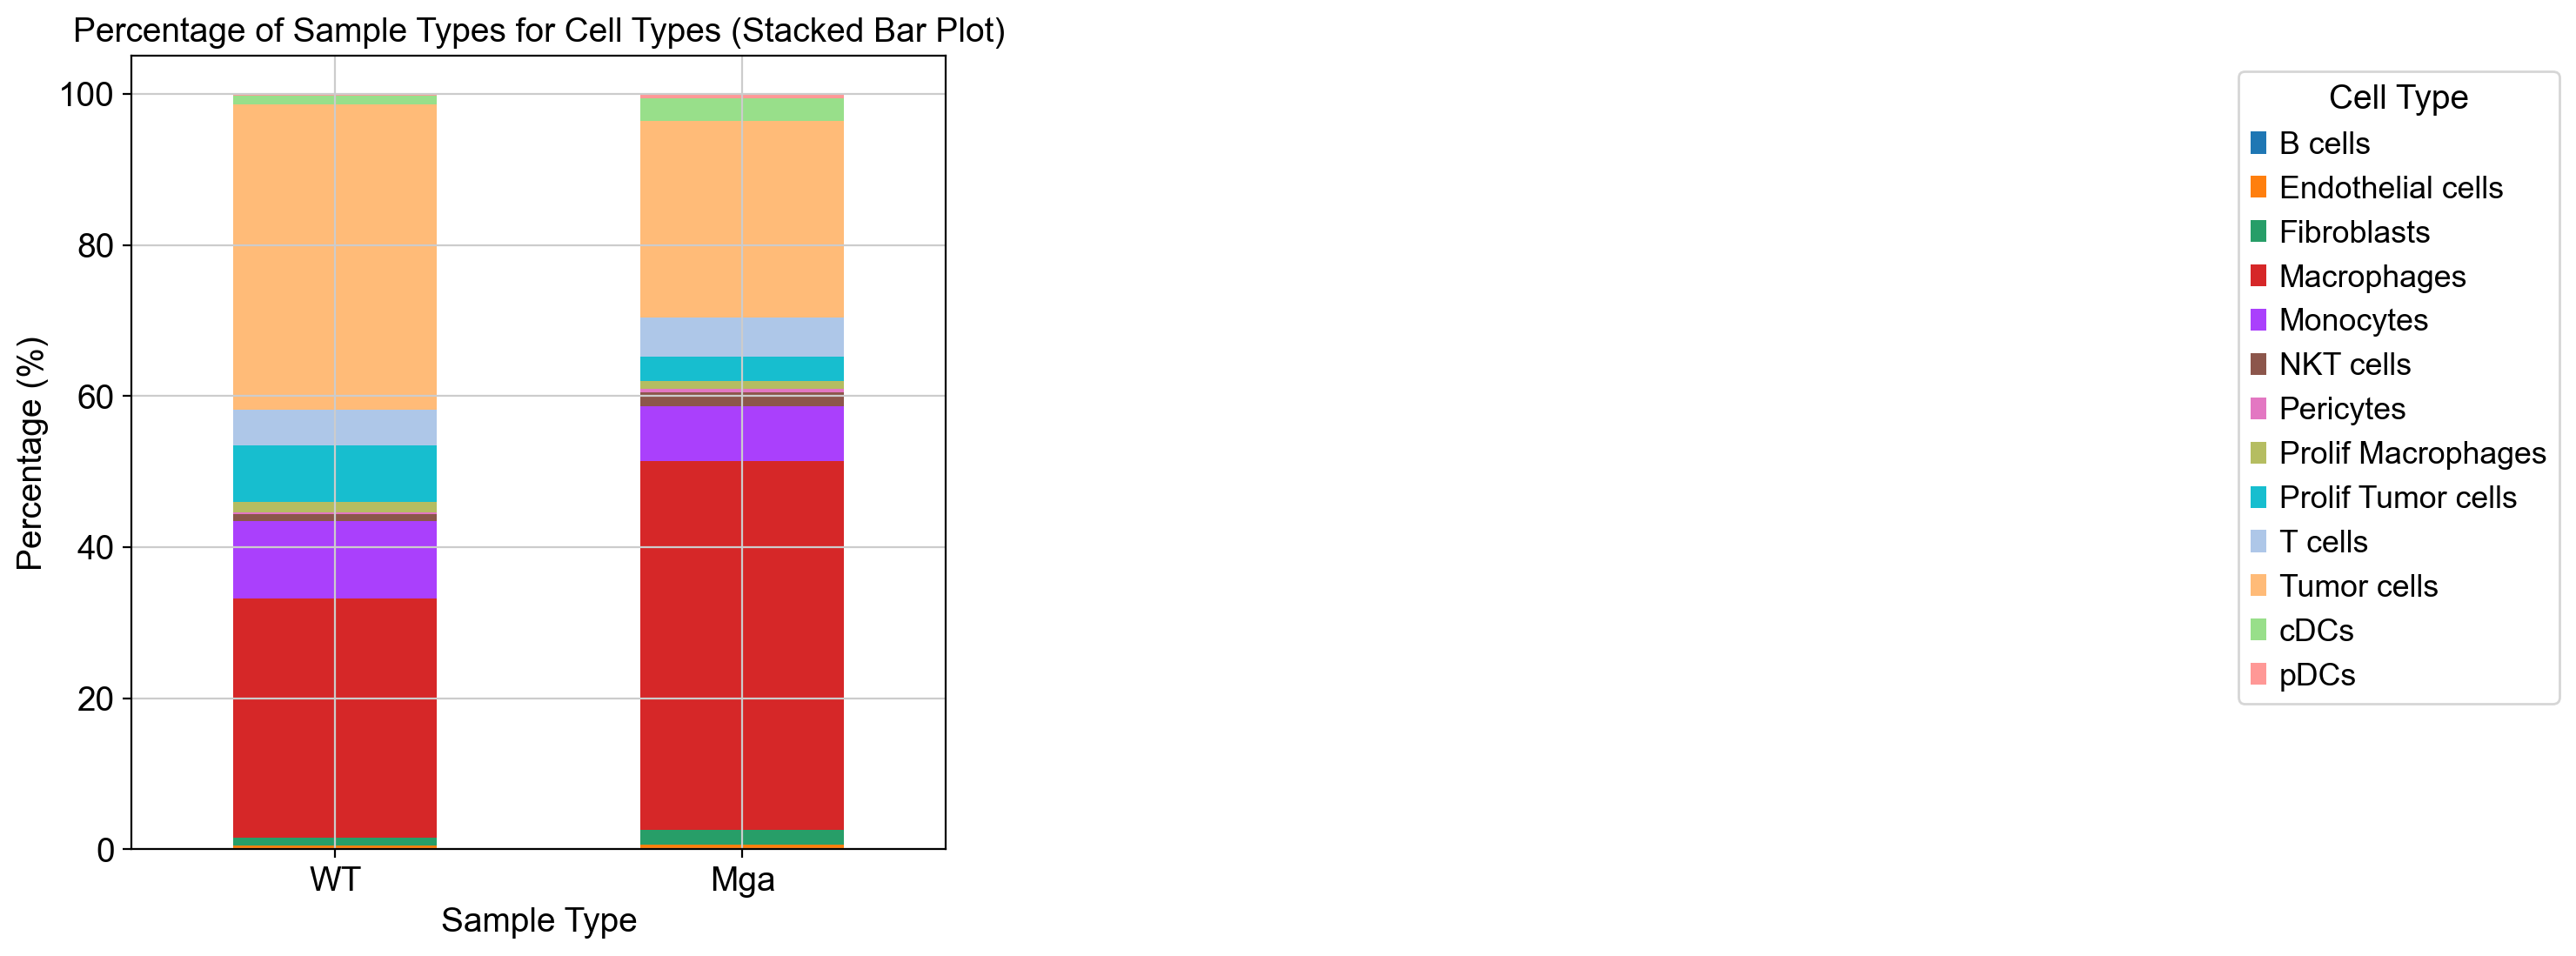

In [58]:
import matplotlib.pyplot as plt

# Calculate percentages for each predicted label separately for 'Mga' and 'WT'
total_counts_wt = counts_table['WT']
total_counts_mga = counts_table['Mga']
percentage_counts_wt = counts_table['WT'] / total_counts_wt.sum() * 100
percentage_counts_mga = counts_table['Mga'] / total_counts_mga.sum() * 100

# Create a DataFrame for the percentages
percentage_df = pd.DataFrame({'WT': percentage_counts_wt, 'Mga': percentage_counts_mga})

# Transpose the DataFrame so that 'WT' and 'Mga' are on the x-axis
percentage_df = percentage_df.T

# Define colors
cell_type_colors = adata.uns['cell_type_colors']

# Create a stacked bar plot
ax = percentage_df.plot(kind='bar', stacked=True, figsize=(6, 6), color=cell_type_colors)

# Set labels and title
plt.xlabel('Sample Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Sample Types for Cell Types (Stacked Bar Plot)')

# Customize the legend
plt.legend(title='Cell Type', loc='upper right', bbox_to_anchor=(3, 1))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0, ha='center')

# Save the plot as a PDF file
plt.savefig('4.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
# make WT for cellchat

In [11]:
raw=sc.read("C:/Users/hyjfo/Downloads/WT_Mga_raw.h5ad")
raw

AnnData object with n_obs × n_vars = 59007 × 32285
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

In [12]:
raw.obs['type'] = (raw.obs['batch'].map
                     (lambda x: {'WT_1':'WT', 'WT_2':'WT', 'WT_3':'WT', 'Mga_1':'Mga', 'Mga_2':'Mga', 'Mga_3':'Mga',}.get(x, x)).astype("category"))
raw

AnnData object with n_obs × n_vars = 59007 × 32285
    obs: 'batch', 'type'
    var: 'gene_ids', 'feature_types'

In [13]:
adata=sc.read("C:/Users/hyjfo/Downloads/WT_Mga_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 53548 × 2000
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [14]:
WT=raw[raw.obs['type'].isin(['WT'])]
WT

View of AnnData object with n_obs × n_vars = 31527 × 32285
    obs: 'batch', 'type'
    var: 'gene_ids', 'feature_types'

In [15]:
WT.obs['cell_type']=adata.obs['cell_type']
WT.obs['cell_type']

AAACCCAAGATCCCGC-1-WT_1    Prolif Macrophages
AAACCCACAACTGCCG-1-WT_1                   NaN
AAACCCACAAGGACAC-1-WT_1     Endothelial cells
AAACCCACAATAAGGT-1-WT_1                   NaN
AAACCCACATGTACGT-1-WT_1           Tumor cells
                                  ...        
TTTGTTGGTACACGTT-1-WT_3           Macrophages
TTTGTTGGTACGCTTA-1-WT_3           Tumor cells
TTTGTTGGTCACATTG-1-WT_3           Macrophages
TTTGTTGTCATCTACT-1-WT_3           Macrophages
TTTGTTGTCCACAGCG-1-WT_3           Tumor cells
Name: cell_type, Length: 31527, dtype: category
Categories (13, object): ['B cells', 'Endothelial cells', 'Fibroblasts', 'Macrophages', ..., 'T cells', 'Tumor cells', 'cDCs', 'pDCs']

In [16]:
WT = WT[WT.obs['cell_type'].notna()]
WT

View of AnnData object with n_obs × n_vars = 28647 × 32285
    obs: 'batch', 'type', 'cell_type'
    var: 'gene_ids', 'feature_types'

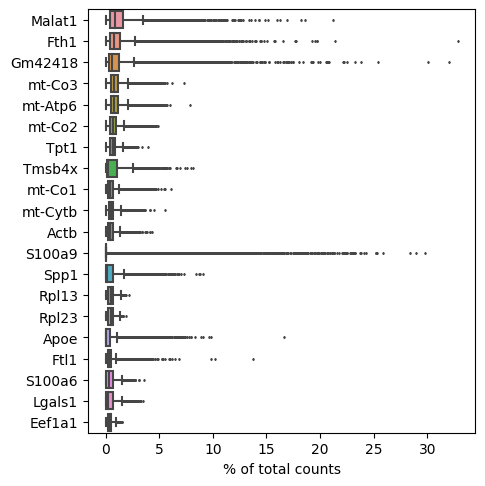

In [17]:
sc.pl.highest_expr_genes(WT, n_top=20)
sc.pp.filter_cells(WT, min_genes=100)
sc.pp.filter_genes(WT, min_cells=25)

In [18]:
WT.var['mt'] = WT.var_names.str.startswith('mt-')
WT.var['rpl'] = WT.var_names.str.startswith('Rpl')
WT.var['rps'] = WT.var_names.str.startswith('Rps')
WT

AnnData object with n_obs × n_vars = 28647 × 18881
    obs: 'batch', 'type', 'cell_type', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps'

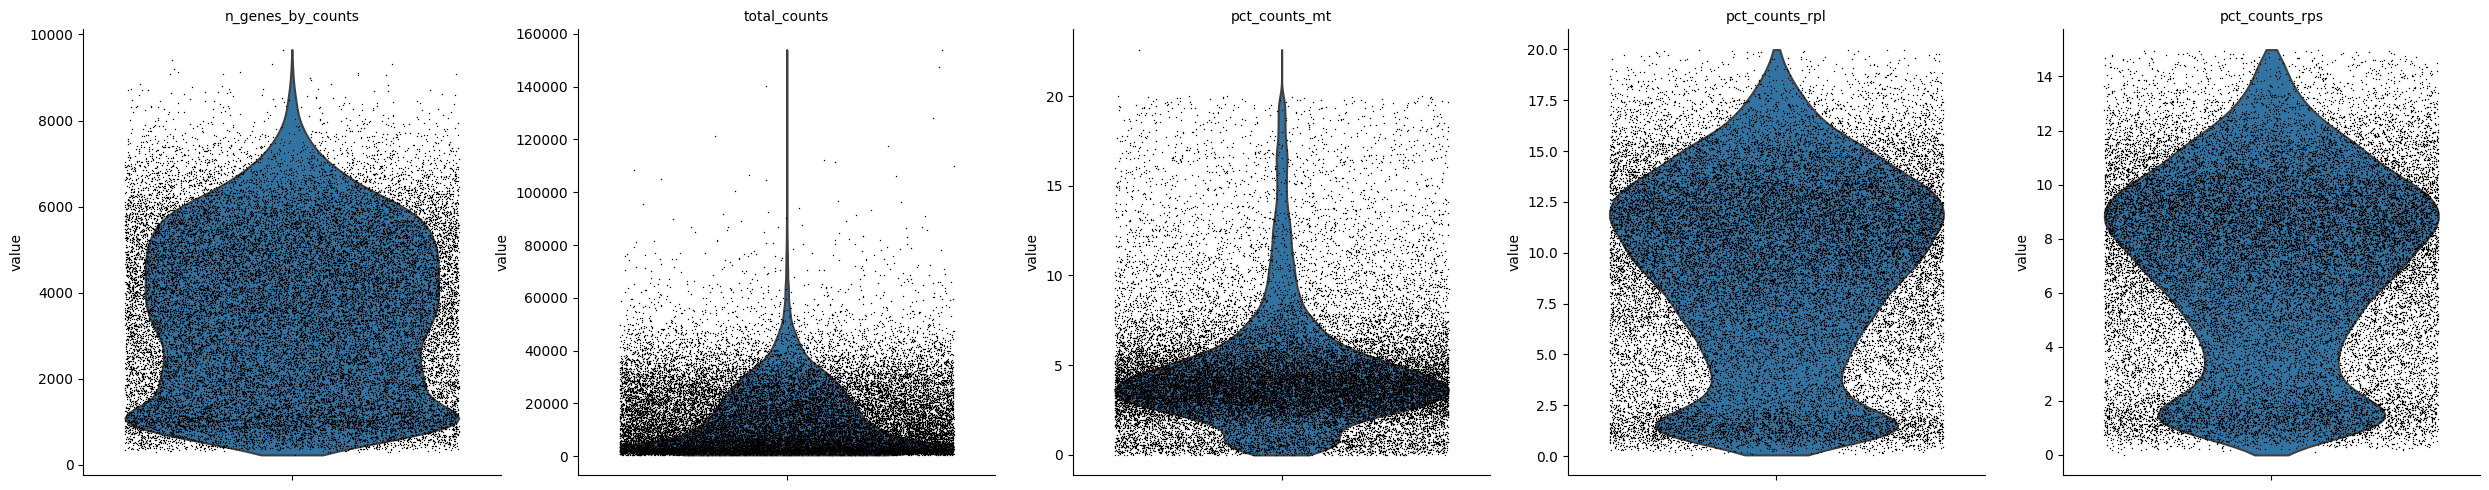

AnnData object with n_obs × n_vars = 28647 × 18881
    obs: 'batch', 'type', 'cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [19]:
sc.pp.calculate_qc_metrics(WT, qc_vars=['mt','rpl','rps'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(WT, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_rpl','pct_counts_rps'], jitter=0.4, multi_panel=True)
WT

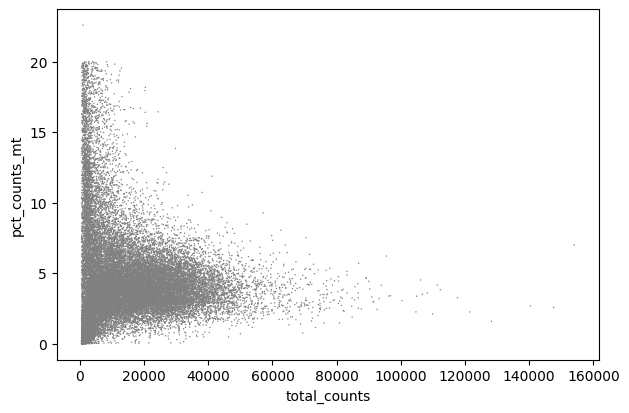

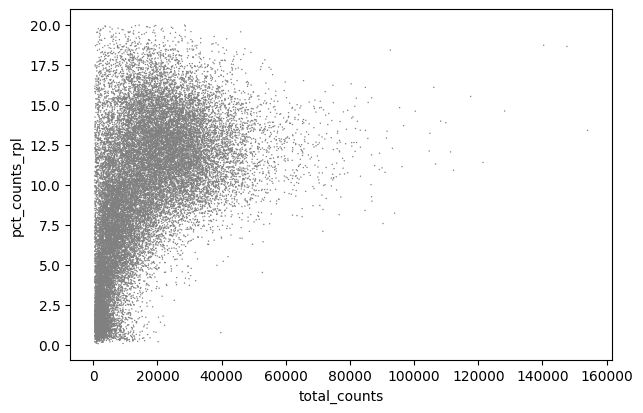

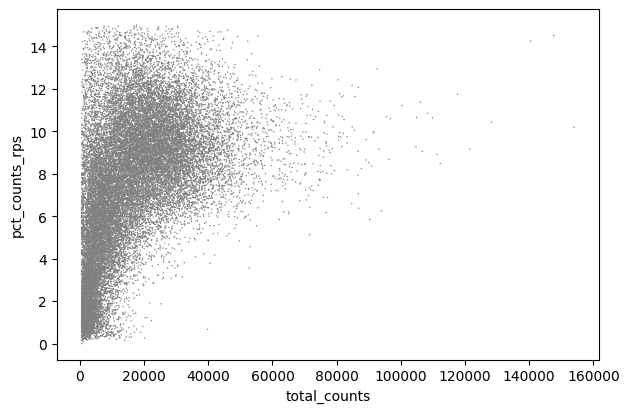

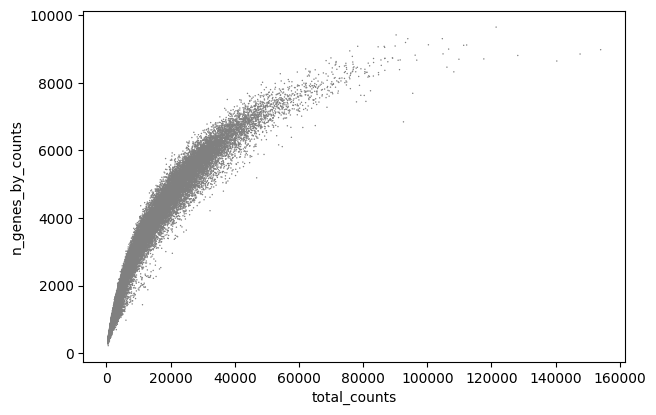

In [20]:
sc.pl.scatter(WT, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(WT, x='total_counts', y='pct_counts_rpl')
sc.pl.scatter(WT, x='total_counts', y='pct_counts_rps')
sc.pl.scatter(WT, x='total_counts', y='n_genes_by_counts')

In [21]:
WT = WT[WT.obs.n_genes_by_counts < 11000, :]
WT = WT[WT.obs.pct_counts_mt < 50, :]
WT = WT[WT.obs.pct_counts_rpl < 50, :]
WT = WT[WT.obs.pct_counts_rps < 50, :]
WT

View of AnnData object with n_obs × n_vars = 28647 × 18881
    obs: 'batch', 'type', 'cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [22]:
sc.pp.normalize_total(WT, target_sum=1e4)
sc.pp.log1p(WT)
WT

AnnData object with n_obs × n_vars = 28647 × 18881
    obs: 'batch', 'type', 'cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [23]:
WT.write('C:/Users/hyjfo/Documents/WT_cellchat_test.h5ad', compression='gzip')

In [95]:
# make Mga for cellchat

In [24]:
raw=sc.read("C:/Users/hyjfo/Downloads/WT_Mga_raw.h5ad")
raw

AnnData object with n_obs × n_vars = 59007 × 32285
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

In [25]:
raw.obs['type'] = (raw.obs['batch'].map
                     (lambda x: {'WT_1':'WT', 'WT_2':'WT', 'WT_3':'WT', 'Mga_1':'Mga', 'Mga_2':'Mga', 'Mga_3':'Mga',}.get(x, x)).astype("category"))
raw

AnnData object with n_obs × n_vars = 59007 × 32285
    obs: 'batch', 'type'
    var: 'gene_ids', 'feature_types'

In [26]:
adata=sc.read("C:/Users/hyjfo/Downloads/WT_Mga_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 53548 × 2000
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [28]:
Mga=raw[raw.obs['type'].isin(['Mga'])]
Mga

View of AnnData object with n_obs × n_vars = 27480 × 32285
    obs: 'batch', 'type'
    var: 'gene_ids', 'feature_types'

In [29]:
Mga.obs['cell_type']=adata.obs['cell_type']
Mga.obs['cell_type']

AAACCCAAGCTTAAGA-1-Mga_1    Macrophages
AAACCCAAGTGAGGCT-1-Mga_1    Tumor cells
AAACCCACAACGGGTA-1-Mga_1            NaN
AAACCCACAATAACGA-1-Mga_1    Tumor cells
AAACCCACAATGTGGG-1-Mga_1           cDCs
                               ...     
TTTGTTGGTAGGGAGG-1-Mga_3            NaN
TTTGTTGGTTGCTAGT-1-Mga_3        T cells
TTTGTTGTCACTGGTA-1-Mga_3    Macrophages
TTTGTTGTCGTTCATT-1-Mga_3    Macrophages
TTTGTTGTCTTGGGCG-1-Mga_3    Macrophages
Name: cell_type, Length: 27480, dtype: category
Categories (13, object): ['B cells', 'Endothelial cells', 'Fibroblasts', 'Macrophages', ..., 'T cells', 'Tumor cells', 'cDCs', 'pDCs']

In [30]:
Mga = Mga[Mga.obs['cell_type'].notna()]
Mga

View of AnnData object with n_obs × n_vars = 24901 × 32285
    obs: 'batch', 'type', 'cell_type'
    var: 'gene_ids', 'feature_types'

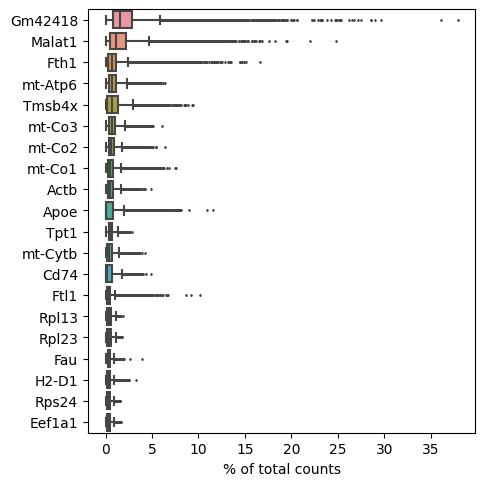

In [31]:
sc.pl.highest_expr_genes(Mga, n_top=20)
sc.pp.filter_cells(Mga, min_genes=100)
sc.pp.filter_genes(Mga, min_cells=25)

In [32]:
Mga.var['mt'] = Mga.var_names.str.startswith('mt-')
Mga.var['rpl'] = Mga.var_names.str.startswith('Rpl')
Mga.var['rps'] = Mga.var_names.str.startswith('Rps')
Mga

AnnData object with n_obs × n_vars = 24901 × 18926
    obs: 'batch', 'type', 'cell_type', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps'

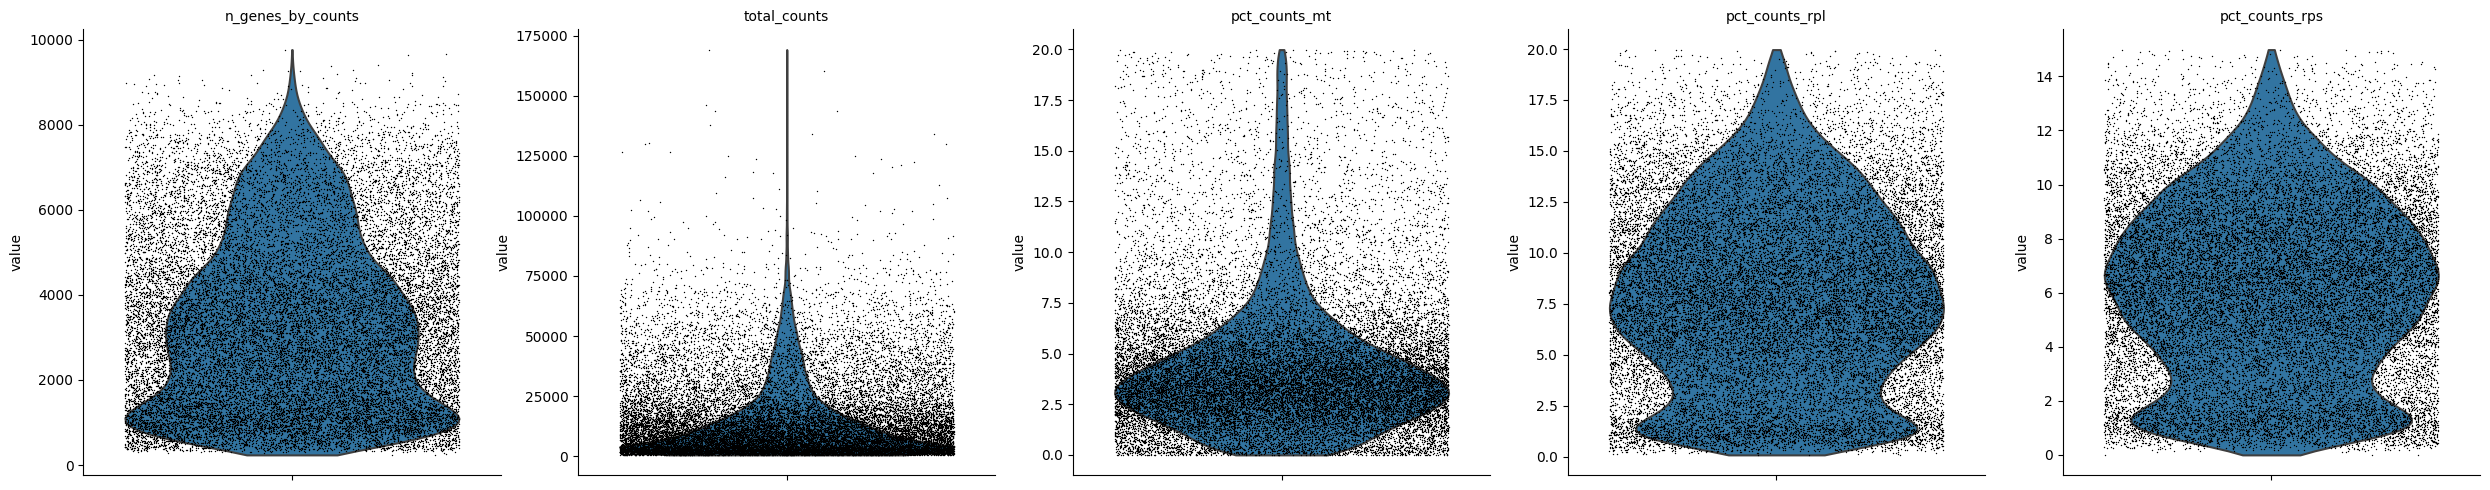

AnnData object with n_obs × n_vars = 24901 × 18926
    obs: 'batch', 'type', 'cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [33]:
sc.pp.calculate_qc_metrics(Mga, qc_vars=['mt','rpl','rps'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(Mga, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_rpl','pct_counts_rps'], jitter=0.4, multi_panel=True)
Mga

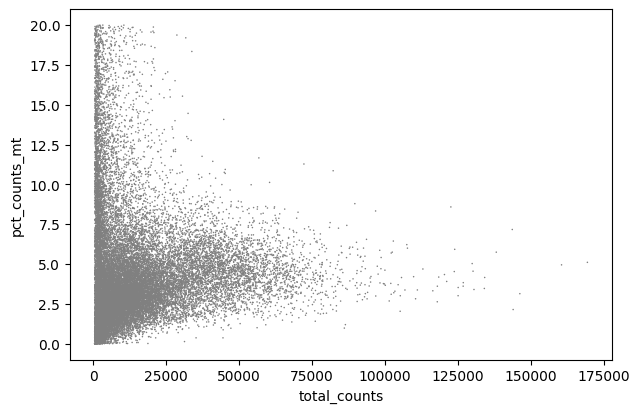

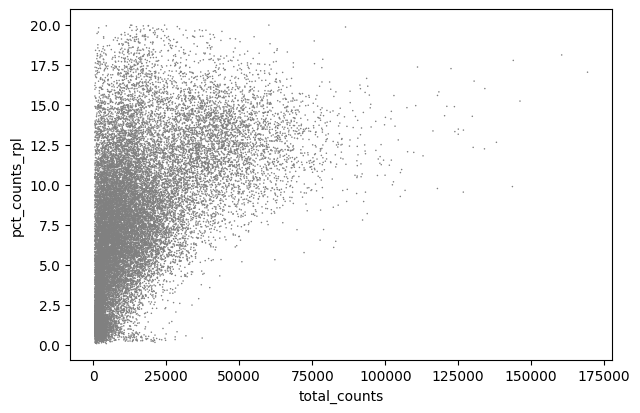

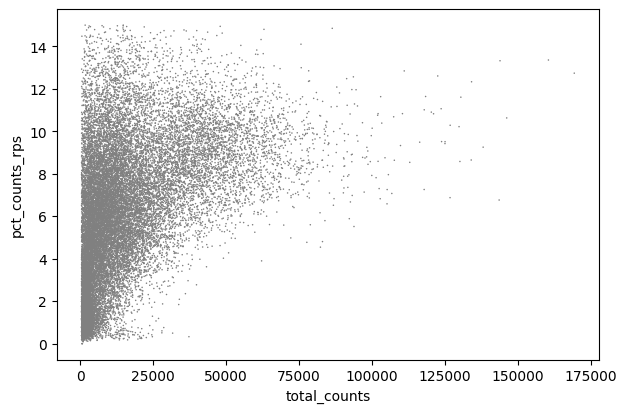

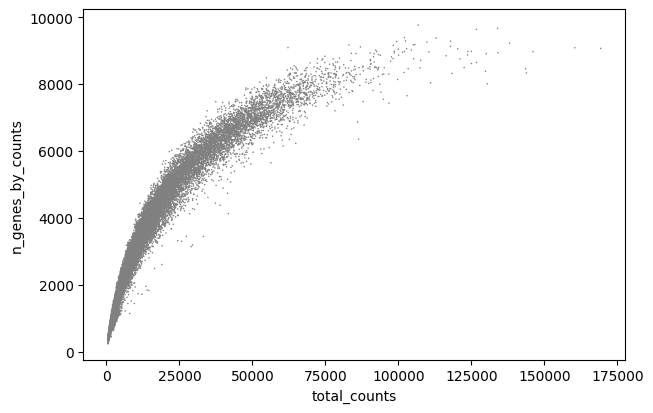

In [34]:
sc.pl.scatter(Mga, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(Mga, x='total_counts', y='pct_counts_rpl')
sc.pl.scatter(Mga, x='total_counts', y='pct_counts_rps')
sc.pl.scatter(Mga, x='total_counts', y='n_genes_by_counts')

In [35]:
Mga = Mga[Mga.obs.n_genes_by_counts < 11000, :]
Mga = Mga[Mga.obs.pct_counts_mt < 50, :]
Mga = Mga[Mga.obs.pct_counts_rpl < 50, :]
Mga = Mga[Mga.obs.pct_counts_rps < 50, :]
Mga

View of AnnData object with n_obs × n_vars = 24901 × 18926
    obs: 'batch', 'type', 'cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [36]:
sc.pp.normalize_total(Mga, target_sum=1e4)
sc.pp.log1p(Mga)
Mga

AnnData object with n_obs × n_vars = 24901 × 18926
    obs: 'batch', 'type', 'cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [37]:
Mga.write('C:/Users/hyjfo/Documents/Mga_cellchat_test.h5ad', compression='gzip')